In [2]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Minnesota Secretary of State (https://www.sos.state.mn.us/elections-voting/election-results/2020/2020-general-election-results/). Precinct shapefile from Minnesota Geospatial Commons (https://gisdata.mn.gov/dataset/bdry-votingdistricts).

- G20PREDBID - Joseph R. Biden (Democratic-Farmer-Labor Party)
- G20PRERTRU - Donald J. Trump (Republican Party)
- G20PRELJOR - Jo Jorgensen (Libertarian Party)
- G20PREGHAW - Howie Hawkins (Green Party)
- G20PREAFUE - Roque "Rocky" De La Fuente (Independence-Alliance Party)
- G20PREPLAR - Gloria La Riva (Socialism and Liberation Party)
- G20PRESKEN - Alyson Kennedy (Socialist Workers Party)
- G20PREIWES - Kanye West (Independent)
- G20PREIPIE - Brock Pierce (Independent)
- G20PREOWRI - Write-in Votes


- G20USSDSMI - Tina Smith (Democratic-Farmer-Labor Party)
- G20USSRLEW - Jason Lewis (Republican Party)
- G20USSMOCO - Kevin O'Connor (Legal Marijuana Now Party)
- G20USSCSTE - Oliver Steinberg (Grassroots - Legalize Cannabis Party)
- G20USSOWRI - Write-in Votes


## Load VEST's Final File

In [3]:
vest_shp = gp.read_file("./raw-from-source/VEST/mn_2020/mn_2020.shp")

In [4]:
vest_shp.shape

(4110, 20)

In [5]:
vest_shp.head(1)

,VTDID,PCTNAME,COUNTYNAME,COUNTYFIPS,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20PREPLAR,G20PRESKEN,G20PREIWES,G20PREIPIE,G20PREOWRI,G20USSDSMI,G20USSRLEW,G20USSMOCO,G20USSCSTE,G20USSOWRI,geometry
0,271730045,Friendship Twp,Yellow Medicine,173,26,96,1,2,1,0,0,0,1,0,27,95,4,2,0,"POLYGON ((-95.72666 44.80511, -95.72658 44.790..."


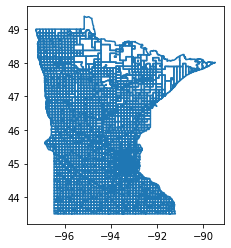

In [6]:
vest_shp.boundary.plot()

# Loading Election Results

In [13]:
election_results = pd.read_excel('./raw-from-source/SOS/2020-general-federal-state-results-by-precinct-official.xlsx', 
                                sheet_name = "Precinct-Results")
election_results = election_results[['VTDID','PCTNAME','PCTCODE','MCDNAME','COUNTYNAME','COUNTYCODE','TOTVOTING', 
                                         'USPRSR','USPRSDFL','USPRSIA','USPRSGP','USPRSINDKW','USPRSINDBP','USPRSSLP',
                                         'USPRSSWP','USPRSLIB','USPRSWI','USPRSTOTAL','USSENLMN','USSENGLC','USSENR',
                                         'USSENDFL','USSENWI','USSENTOTAL']]

In [15]:
election_results.columns = ['VTDID','PCTNAME','PCTCODE','MCDNAME','COUNTYNAME','COUNTYCODE','TOTVOTING', 
                                         'G20PRERTRU','G20PREDBID','G20PREAFUE','G20PREGHAW','G20PREIWES','G20PREIPIE','G20PREPLAR',
                                         'G20PRESKEN','G20PRELJOR','G20PREOWRI','USPRSTOTAL',
                                         'G20USSMOCO','G20USSCSTE','G20USSRLEW','G20USSDSMI','G20USSOWRI','USSENTOTAL']
election_results.head()

,VTDID,PCTNAME,PCTCODE,MCDNAME,COUNTYNAME,COUNTYCODE,TOTVOTING,G20PRERTRU,G20PREDBID,G20PREAFUE,...,G20PRESKEN,G20PRELJOR,G20PREOWRI,USPRSTOTAL,G20USSMOCO,G20USSCSTE,G20USSRLEW,G20USSDSMI,G20USSOWRI,USSENTOTAL
0,270010005,AITKIN,5.0,Aitkin,Aitkin,1.0,1098.0,626.0,446.0,3.0,...,0.0,9.0,0.0,1091.0,79.0,22.0,545.0,421.0,0.0,1067.0
1,270010010,AITKIN TWP,10.0,Aitkin Twp,Aitkin,1.0,577.0,379.0,187.0,1.0,...,2.0,3.0,1.0,576.0,27.0,5.0,363.0,171.0,0.0,566.0
2,270010015,BALL BLUFF TWP,15.0,Ball Bluff Twp,Aitkin,1.0,185.0,107.0,75.0,0.0,...,0.0,3.0,0.0,185.0,6.0,1.0,95.0,79.0,0.0,181.0
3,270010020,BALSAM TWP,20.0,Balsam Twp,Aitkin,1.0,24.0,12.0,11.0,0.0,...,0.0,0.0,0.0,24.0,0.0,0.0,13.0,11.0,0.0,24.0
4,270010025,BEAVER TWP,25.0,Beaver Twp,Aitkin,1.0,38.0,17.0,20.0,0.0,...,0.0,0.0,1.0,38.0,0.0,0.0,16.0,20.0,0.0,36.0


## Add County Fips Code

In [16]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Minnesota"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

In [26]:
election_results['COUNTYFP'] = election_results['COUNTYNAME'].map(fips_dict)

In [37]:
election_results[election_results['COUNTYFP'].isnull()][['COUNTYNAME','COUNTYFP']].drop_duplicates()

,COUNTYNAME,COUNTYFP
1978,Lake Of The Woods,NaN
3251,St. Louis,NaN
4110,NaN,NaN


In [39]:
fips_dict['Lake Of The Woods'] = '077'
fips_dict['St. Louis'] = '137'
election_results['COUNTYFP'] = election_results['COUNTYNAME'].map(fips_dict)
election_results[election_results['COUNTYFP'].isnull()][['COUNTYNAME','COUNTYFP']].drop_duplicates()

,COUNTYNAME,COUNTYFP
4110,NaN,NaN


# Join Election Results

In [40]:
print(vest_shp.shape)
print(election_results.shape)

(4110, 20)
(4111, 25)


In [41]:
merged_df = vest_shp.merge(election_results, how = 'outer', on = 'VTDID', indicator = True)
merged_df.groupby('_merge').count()

,VTDID,PCTNAME_x,COUNTYNAME_x,COUNTYFIPS,G20PREDBID_x,G20PRERTRU_x,G20PRELJOR_x,G20PREGHAW_x,G20PREAFUE_x,G20PREPLAR_x,...,G20PRELJOR_y,G20PREOWRI_y,USPRSTOTAL,G20USSMOCO_y,G20USSCSTE_y,G20USSRLEW_y,G20USSDSMI_y,G20USSOWRI_y,USSENTOTAL,COUNTYFP
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
right_only,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,4110,4110,4110,4110,4110,4110,4110,4110,4110,4110,...,4110,4110,4110,4110,4110,4110,4110,4110,4110,4110


# Validating Election Results

## Statewide

In [43]:
vest_shp.columns

Index(['VTDID', 'PCTNAME', 'COUNTYNAME', 'COUNTYFIPS', 'G20PREDBID',
       'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW', 'G20PREAFUE', 'G20PREPLAR',
       'G20PRESKEN', 'G20PREIWES', 'G20PREIPIE', 'G20PREOWRI', 'G20USSDSMI',
       'G20USSRLEW', 'G20USSMOCO', 'G20USSCSTE', 'G20USSOWRI', 'geometry'],
      dtype='object')

In [44]:
data_columns = ['G20PREDBID',
       'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW', 'G20PREAFUE', 'G20PREPLAR',
       'G20PRESKEN', 'G20PREIWES', 'G20PREIPIE', 'G20PREOWRI', 'G20USSDSMI',
       'G20USSRLEW', 'G20USSMOCO', 'G20USSCSTE', 'G20USSOWRI']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- election_results[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")


Printing differences below
G20PREDBID is equal 	VEST: 1717077 	RDH: 1717077.0
G20PRERTRU is equal 	VEST: 1484065 	RDH: 1484065.0
G20PRELJOR is equal 	VEST: 34976 	RDH: 34976.0
G20PREGHAW is equal 	VEST: 10033 	RDH: 10033.0
G20PREAFUE is equal 	VEST: 5611 	RDH: 5611.0
G20PREPLAR is equal 	VEST: 1210 	RDH: 1210.0
G20PRESKEN is equal 	VEST: 643 	RDH: 643.0
G20PREIWES is equal 	VEST: 7940 	RDH: 7940.0
G20PREIPIE is equal 	VEST: 5651 	RDH: 5651.0
G20PREOWRI is equal 	VEST: 9965 	RDH: 9965.0
G20USSDSMI is equal 	VEST: 1566522 	RDH: 1566522.0
G20USSRLEW is equal 	VEST: 1398145 	RDH: 1398145.0
G20USSMOCO is equal 	VEST: 190154 	RDH: 190154.0
G20USSCSTE is equal 	VEST: 57174 	RDH: 57174.0
G20USSOWRI is equal 	VEST: 2261 	RDH: 2261.0

All other races are equal


## County-by-County Totals

In [47]:
print("Counties with differences printed below:")
diff_counties=[]
for i in data_columns:
    diff = vest_shp.groupby(["COUNTYFIPS"]).sum()[i]-election_results.groupby(["COUNTYFP"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")


Counties with differences printed below:

All other races in all counties are equal


## Precinct-by-Precinct Totals

In [49]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["VTDID"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["VTDID"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["VTDID"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)
    
validater_row(merged_df,data_columns)



There are  4111  total rows
0  of these rows have election result differences
4111  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10
[]
